# Practical: Materials Project
```{admonition} Python
:class: tip
For this practical, we need to do some coding in Python. If you are not familiar with Python, you should do the 
[Introductory Videos on Python](https://drive.google.com/drive/folders/1Q3HjLFGMUTwv9htJXONZRMGUosSv7Odi?usp=sharing) provided by [Dr. Sasani Jayawardhana](https://cde.nus.edu.sg/mse/staff/sasani-jayawardhana/).

Particularly, we will use lots of libraries in Python. If you are not familiar with Python libraries, you should do work harder after go through the introductory videos and try to understand as much as possible.
```
In this practical, we will use the Materials Project API to access information about materials. The Materials Project is a database of materials properties that is maintained by the Lawrence Berkeley National Laboratory. The database contains information about the properties of a large number of materials, including their crystal structures, band structures, and thermodynamic properties.

## Register for a Materials Project API Key
To access the Materials Project API, you will need to register for an API key. You can register an account of Materials Project by visiting the following website:
https://profile.materialsproject.org/

Then you can find your `API key` in the dashboard page. You should set your `MP_API_KEY` in the following cell.

In [2]:
MP_API_KEY = "lhJhUip71qdeolIIO6fvSRHhVyNtjwIF" # check https://next-gen.materialsproject.org/dashboard for your API key

```{admonition} Materials Project API Key
:class: tip
You should keep your API key secret and not share it with others. If you suspect that your API key has been compromised, you can regenerate a new API key in the dashboard page.

You can find more information about the Materials Project API at the following website:
https://next-gen.materialsproject.org/api
```

## Install the `mp_api` Package
We need to install `mp_api` package to access the Materials Project API. You can install the package using the following command:

In [3]:
# you can skip this if you've already installed the mp_api package.
!pip install mp_api 

````{admonition} Python Version Problem
:class: tip

If you're using Python version 3.13, you might encounter installation error. You need to reinstall a lower version of Python (e.g. 3.12). If you don't have any problem install the package, you can skip the following steps.

- First, you need to uninstall the current local enviornment. Open Anaconda Prompt and type the following command. Assuming `mi` is your local enviornment name.
```bash
conda remove --name mi --all
```
- Then recreate a new local enviornment with Python version 3.12. Open Anaconda Prompt and type the following command.
```bash
conda create -n mi python=3.12
```
- Activate the local enviornment. Open Anaconda Prompt and type the following command.
```bash
conda activate mi
```

- Activate the local enviornment. Open Anaconda Prompt and type the following command.
```bash
pip install jupyter ase pymatgen
```
- Then close and reopen your VS Code and try above cell again.

````

## Querying Data from the Materials Project Database
We can query data from the Materials Project database using the `mp_api` package. The `mp_api` package provides a Python interface to the Materials Project API, which allows you to query the database for information about materials. The package provides a number of functions for querying the database, including functions for querying materials by chemical formula, by material ID, and by crystal structure.

To query data from the data base, we need to import the `MPRester` class from the `mp_api` package. We can then create an instance of the `MPRester` class, passing our API key as an argument to the constructor. We can then use the instance to query the database for information about materials.

In the example below, we are searching data using the `material_ids`.

```{admonition} Python API
:class: info
Here we are using API. If you don't know what is class, instances, you can check the [Object-Oriented Programming](https://realpython.com/python3-object-oriented-programming/). There are other online tutorials as well.
```

### Query Materials by Material ID
You can query the Materials Project database for information about a material by its material ID. The material ID is a unique identifier that is assigned to each material in the database. You can find the material ID for a material by searching for the material on the Materials Project website.

In [4]:
from mp_api.client import MPRester

# Pass your API key directly as an argument.
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        material_ids=["mp-149", "mp-13", "mp-2131"]
    )

d:\Anaconda\envs\mi\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving SummaryDoc documents: 100%|██████████| 3/3 [00:00<?, ?it/s]


### Show the Available Fields
We can check the available properties from `mpr.materials.summary.available_fields`.

In [5]:
print(f"Available fields: {mpr.materials.summary.available_fields}")

# Print out the data (some) for each material
for example_doc in docs:
    print("\n--------------------")
    print(f"Material ID: {example_doc.material_id}")
    print(f"Theoretical? {example_doc.theoretical}") # whether this structure is a purely theoretical structure or  not (also exist in experiment)
    print(f"Formula: {example_doc.formula_pretty}")

Available fields: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic

### Customize the Search Function
We can customize our search in `search()` function. For example, we can search for materials with a specific chemical formula, or we can search for materials with specific density. Please note that sometimes, the search may return lots of results, it's better to save these results into a `json` file.

#### Chemsys Search
You can use `chemsys` to search for materials with specific elements. For example, `Fe-O` will search for materials with Iron and Oxygen. You can also use `fields` to specify the properties you want to get. You can find more information about the search in the [Materials Project API documentation](https://materialsproject.org/docs/api).

In [6]:
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        chemsys="Li-Fe-P-O", is_stable=True,
        fields=["material_id", "volume", "elements","structure"]
    )

Retrieving SummaryDoc documents: 100%|██████████| 5/5 [00:00<?, ?it/s]


In [7]:
# dump results to a json file
import json
with open('materials_data.json', 'w') as f:
    json.dump([doc.dict() for doc in docs], f, indent=4)

You can use wildcard `*` to search for all elements. You can also put formula pattern in search. For example, `ABO3` will search for ternary materials with formula ending with `O3`, structure with perovskite related composition.


In [8]:
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        chemsys="O-*-*", formula="ABO3",
        fields=["material_id", "band_gap","composition", "energy_above_hull"], 
        energy_above_hull=[0,0.01], band_gap=[0.5, 1.5]
    )
    mpid_bgap_dict = {doc.material_id: [doc.band_gap, doc.composition, doc.energy_above_hull] for doc in docs}

print(f"Materials found: {len(mpid_bgap_dict)}")
for mpid, (bgap, composition, energy_above_hull) in mpid_bgap_dict.items():
    print(f"Material ID: {mpid}, Band gap: {bgap:.2f} eV, Composition: {composition}, Energy above hull: {energy_above_hull*1000:.2f} meV")

Retrieving SummaryDoc documents: 100%|██████████| 71/71 [00:00<?, ?it/s]

Materials found: 71
Material ID: mp-1221539, Band gap: 0.91 eV, Composition: Mo4 Br12 O4, Energy above hull: 0.00 meV
Material ID: mp-558934, Band gap: 1.27 eV, Composition: Hg36 Cl12 O12, Energy above hull: 4.59 meV
Material ID: mp-29019, Band gap: 0.63 eV, Composition: Rb18 I6 O6, Energy above hull: 0.00 meV
Material ID: mp-505212, Band gap: 1.33 eV, Composition: Cs6 Au2 O2, Energy above hull: 0.00 meV
Material ID: mp-28166, Band gap: 0.89 eV, Composition: K3 Br1 O1, Energy above hull: 0.00 meV
Material ID: mp-28171, Band gap: 1.03 eV, Composition: K3 I1 O1, Energy above hull: 0.00 meV
Material ID: mp-9200, Band gap: 0.56 eV, Composition: K3 Au1 O1, Energy above hull: 0.00 meV
Material ID: mp-673798, Band gap: 1.03 eV, Composition: K6 Cl2 O2, Energy above hull: 7.48 meV
Material ID: mp-546285, Band gap: 0.82 eV, Composition: Nb2 I6 O2, Energy above hull: 0.00 meV
Material ID: mp-11649, Band gap: 0.51 eV, Composition: Ca12 Si4 O4, Energy above hull: 0.71 meV
Material ID: mp-572291, Ba

```{admonition} Results from Materials Project
:class: tip
Results from Materials Project are the calculated values using DFT. They may not be the same as the experimental values. You should always verify the results from the Materials Project with the experimental data. Some properties, e.g. band gap, are difficult to calculate accurately. You should be careful when using these properties.
```

### Get Properties

#### Get Structure
You can get the structure of the material using `get_structure_by_material_id()` function. It will return a `pymatgen.core.Structure` object. You can save the structure to a `cif` file using `structure.to()` function.


In [9]:
from mp_api.client import MPRester

with MPRester(MP_API_KEY) as mpr:
    structure = mpr.materials.get_structure_by_material_id(material_id="mp-149")

structure.to(filename="mp-149.cif")
                                                      

Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


"# generated using pymatgen\ndata_Si\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   3.84927840\n_cell_length_b   3.84927941\n_cell_length_c   3.84927800\n_cell_angle_alpha   60.00001213\n_cell_angle_beta   60.00000347\n_cell_angle_gamma   60.00001098\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Si\n_chemical_formula_sum   Si2\n_cell_volume   40.32952685\n_cell_formula_units_Z   2\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Si  Si0  1  0.87500000  0.87500000  0.87500000  1\n  Si  Si1  1  0.12500000  0.12500000  0.12500000  1\n"

#### Thermodynamic Properties
You can construct a phase diagram using the queried data from Materials Project using `get_phase_diagram_from_chemsys()` function. Noted that the phase diagram is calculated using DFT and may not be the same as the experimental phase diagram as there is no temperature and pressure information.

<Axes: xlabel='Fraction', ylabel='Formation energy (eV/atom)'>

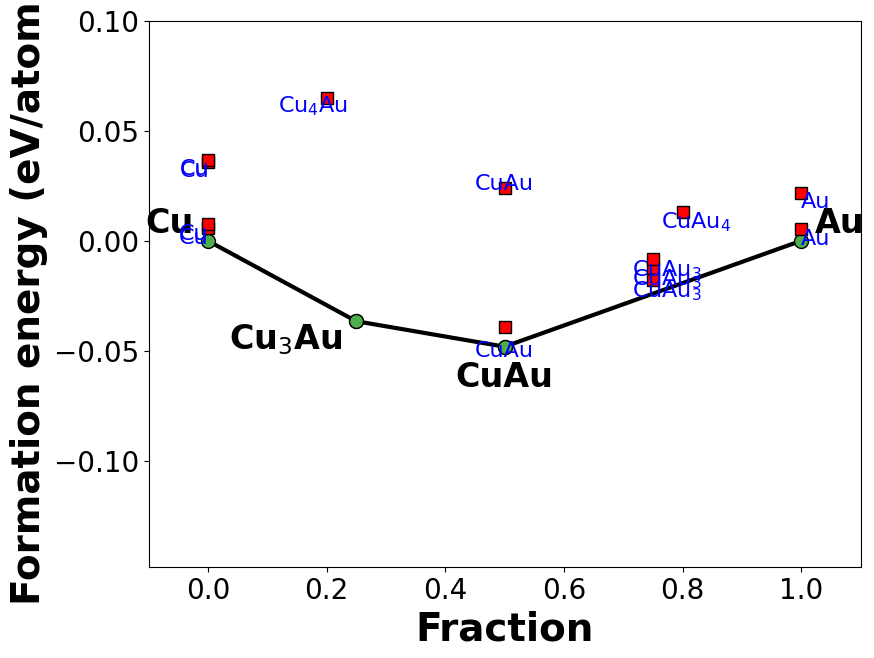

In [10]:
from mp_api.client import MPRester
from emmet.core.thermo import ThermoType

with MPRester(MP_API_KEY) as mpr:
    
    # -- GGA/GGA+U mixed phase diagram
    pd = mpr.materials.thermo.get_phase_diagram_from_chemsys(chemsys="Cu-Au", 
                                                   thermo_type=ThermoType.GGA_GGA_U)
    
pd.get_plot(backend='matplotlib')
                                                      

**If you have encountered problem of using `plotly` to plot your data as backend, you can set the backend to `matplotlib`.**


In [11]:
from mp_api.client import MPRester
from emmet.core.thermo import ThermoType

with MPRester(MP_API_KEY) as mpr:
    
    # -- GGA/GGA+U mixed phase diagram
    pd = mpr.materials.thermo.get_phase_diagram_from_chemsys(chemsys="Li-Fe-P-O", 
                                                   thermo_type=ThermoType.GGA_GGA_U)
                                                      
    

Since this is a pymatgen `PhaseDiagram` object, you can visualize the results.

```{admonition} PhaseDiagram Object
:class: info
We will discuss `PhaseDiagram` object in the chapter of high-throughput computing.
```


In [12]:
pd.get_plot(backend='plotly', show_unstable=False)